In [41]:
import gensim
from src.nlprocessing import ProcessCorpus
import pandas as pd
import numpy as np

import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [79]:
model = gensim.models.LdaModel.load('mdl/model1/model')

In [86]:
data = pd.read_csv('../data/comments.csv', sep='|').dropna()

In [4]:
corpus = ProcessCorpus()
corpus.fit(data['text'], frequency=5)

In [80]:
top_topics = model.top_topics(corpus.gensim_corpus)

In [7]:
def get_topic_perplex(top_topics):
    perplexity=[]
    for i in range(len(top_topics)):
        perplexity.append(top_topics[i][1])
    return perplexity

In [20]:
def get_topic_words(top_topics, topic):
    words = []
    for i in range(len(top_topics[topic][0])):
        words.append(top_topics[topic][0][i][1])
    return words

In [81]:
document_topic = model.get_document_topics(corpus.gensim_corpus)

In [74]:
def get_best_topic_per_document(documents):
    best_topic = []
    for i in range(len(documents)):
        prob = []
        for j in range(len(documents[i])):
            prob.append(documents[i][j][1])
        best_topic.append(np.argmax(prob))
    return best_topic

In [82]:
topics = get_best_topic_per_document(document_topic)

(array([1.85100e+03, 6.00000e+00, 2.00000e+00, 2.30000e+01, 2.00000e+00,
        1.30000e+01, 3.39000e+02, 2.75300e+03, 2.85588e+05, 1.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

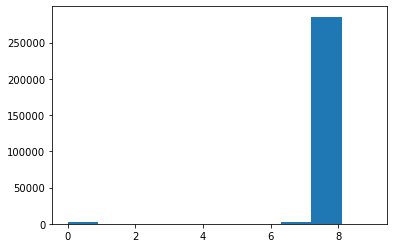

In [85]:
model.num_topics

10